<a href="https://colab.research.google.com/github/Regita-99/1/blob/main/BeOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
dataset=files.upload()

Saving Assets.csv to Assets.csv


In [4]:
df=pd.read_csv('Assets.csv')

In [5]:
df.head()

,token_id,asset_contract_address,owner_address,collection_slug,last_sale_payment_token_id,last_sale_payment_token_symbol,last_sale_payment_token_address,last_sale_payment_token_name,last_sale_payment_token_eth_price,last_sale_payment_token_usd_price,...,num_sales,image_url,description,asset_contract_type,asset_contract_created_date,asset_contract_name,asset_contract_owner,asset_contract_dev_seller_fee_basis_points,asset_favorites,asset_category
0,1041544390811223925548137112510456274926830839...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,spiritman,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,https://lh3.googleusercontent.com/pUDYH7EnULJc...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,4,art
1,3408548560580985823464505673624610083362790836...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,byteosaurus,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,https://lh3.googleusercontent.com/NixgIufh8tt9...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,1,art
2,2344366250094683526428341084644309510528416437...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,crypto-totem-nft,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,Crypto totem is a collection of 5555 totems cr...,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,7,art
3,3038784457613480191389558437600275577887949373...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,ultrapunks,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,Ultra Cyberpunk right now,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,2,art
4,6996,0x417737d49a175d62625154262d8569d3890425ae,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,whaletogether,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,1.0,https://lh3.googleusercontent.com/ndXzObLk0INB...,Alphie is the friendly alpha whale for the lit...,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,242350928.0,750.0,1,art


In [6]:
df=df[['last_sale_payment_token_id', 'asset_contract_owner', 'description']]

In [10]:
df.isna().sum()
#df.dropna(inplace=True)

last_sale_payment_token_id    0
asset_contract_owner          0
description                   0
dtype: int64

In [11]:
df['asset_contract_owner'].describe()

count    6.397000e+03
mean     1.564250e+08
std      9.842418e+07
min      6.010000e+02
25%      6.942687e+07
50%      1.779804e+08
75%      2.574962e+08
max      2.681170e+08
Name: asset_contract_owner, dtype: float64

In [12]:
len(df)

6397

In [15]:
df2=df[df['asset_contract_owner']>2.0000000+00]

In [16]:
len(df), len(df2)

(6397, 6397)

In [17]:
df2.head()

,last_sale_payment_token_id,asset_contract_owner,description
4,1.0,242350928.0,Alphie is the friendly alpha whale for the lit...
8,1.0,265998027.0,"Funk, meet web 3. A collection of 8,888 unique..."
9,1.0,265998027.0,"Funk, meet web 3. A collection of 8,888 unique..."
25,1.0,102384.0,Each Physarum is a 1/1 visualization of the pa...
55,1.0,102384.0,Each Physarum is a 1/1 visualization of the pa...


In [18]:
df.isna().sum()
#df.dropna(inplace=True)

last_sale_payment_token_id    0
asset_contract_owner          0
description                   0
dtype: int64

In [19]:
from sklearn import preprocessing

In [20]:
minmax=preprocessing.MinMaxScaler().fit_transform(df2.drop('description',axis=1))

In [21]:
minmax

array([[0.        , 0.90389977],
       [0.        , 0.99209692],
       [0.        , 0.99209692],
       ...,
       [0.        , 0.64708443],
       [0.00163934, 0.96781622],
       [0.00163934, 0.00172784]])

In [22]:
df3=pd.DataFrame(minmax, index=df.index, columns=df2.columns[:-1])

In [23]:
df3

,last_sale_payment_token_id,asset_contract_owner
4,0.000000,0.903900
8,0.000000,0.992097
9,0.000000,0.992097
25,0.000000,0.000380
55,0.000000,0.000380
...,...,...
16535,0.000000,0.027452
16536,0.000000,0.000256
16538,0.000000,0.647084
16541,0.001639,0.967816


In [25]:
KMeans(n_clusters=2).fit(df3).score(df3)

-163.68719397537524

In [29]:
scr=[]
for i in range(1,10):
  score = KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  scr.append(score)

-881.3404299268993
-163.68719397537524
-78.64351332054585
-41.53794109302149
-25.05375002244707
-13.97592046376244
-11.33391761434812
-9.408905485472049
-7.558727224794742


In [30]:
scr

[-881.3404299268993,
 -163.68719397537524,
 -78.64351332054585,
 -41.53794109302149,
 -25.05375002244707,
 -13.97592046376244,
 -11.33391761434812,
 -9.408905485472049,
 -7.558727224794742]

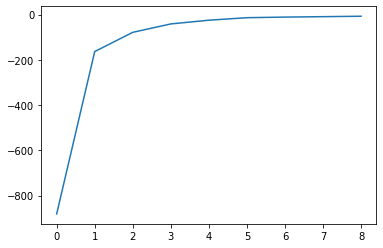

In [31]:
plt.plot(scr)

In [35]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(n_clusters=5)

In [37]:
kmeans.labels_

array([0, 0, 0, ..., 3, 0, 1], dtype=int32)

In [38]:
df3['cluster']=kmeans.labels_

In [39]:
df3

,last_sale_payment_token_id,asset_contract_owner,cluster
4,0.000000,0.903900,0
8,0.000000,0.992097,0
9,0.000000,0.992097,0
25,0.000000,0.000380,1
55,0.000000,0.000380,1
...,...,...,...
16535,0.000000,0.027452,1
16536,0.000000,0.000256,1
16538,0.000000,0.647084,3
16541,0.001639,0.967816,0


(array([2479.,    0., 1378.,    0.,    0., 1513.,    0.,  980.,    0.,
          47.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

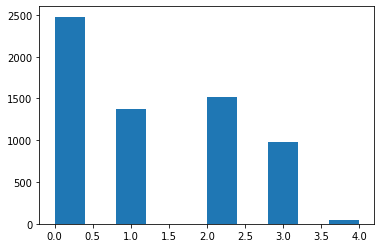

In [40]:
plt.hist(df3['cluster'])

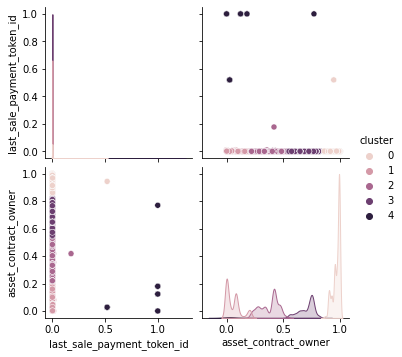

In [41]:
sns.pairplot(df3,hue='cluster')